# Load Data
## multi-class

In [34]:
import pandas as pd

# Load data
data = pd.read_csv('nor_constant_o.csv')
X = data
X = X.drop(
    ['std_burst_med_o', 'std_dev_in_o', 'avg_med_o', 'avg_in_o', 'in_pack_num_o', 'in_pack_sum_o',
    'total_sum_pack_per_sec_o', 'sum_med_o', 'avg_burst_med_o', 'total_num_pack_per_sec_o',
    'sum_burst_med_o', 'in_sum_30_o', 'out_sum_30_o'], axis=1) # 필요없는 피쳐 제외하기
y_mul = pd.read_csv('y_mul.csv').iloc[:, -1]
y_mul = y_mul.replace(95,-1)

In [35]:
X.head()

,std_dev_out_o,avg_out_o,out_pack_sum_o,out_pack_num_o,in_pack_ratio_o,out_pack_ratio_o,total_pack_num_o,total_pack_sum_o,std_dev_med_o,in_num_30_o,out_num_30_o
0,0.4325,0.6741,0.8682,0.1318,0.1153,0.8847,0.1379,0.8745,0.0597,0.3752,0.6248
1,0.2969,0.8333,0.9573,0.0427,0.2600,0.7400,0.0471,0.9618,0.0477,0.3752,0.6248
2,0.4160,0.6817,0.8744,0.1256,0.1195,0.8805,0.1315,0.8806,0.0656,0.3133,0.6886
3,0.4341,0.6766,0.8657,0.1343,0.1132,0.8868,0.1404,0.8721,0.0980,0.3752,0.6248
4,0.4006,0.6811,0.8691,0.1309,0.1090,0.8910,0.1364,0.8748,0.0707,0.3752,0.6248


In [36]:
y_mul.tail()

23995   -1
23996   -1
23997   -1
23998   -1
23999   -1
Name: y, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_mul, y_test_mul = train_test_split(X, y_mul, test_size=0.2, random_state=1)

## Train the model(K-NN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance') # best param
model_name = 'KNN'

model_knn.fit(X_train, y_train_mul)

KNeighborsClassifier(metric='manhattan', weights='distance')

## Test and evaluate

In [39]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_pred_mul = model_knn.predict(X_test)
tpr = recall_score(y_test_mul, y_pred_mul, average='micro')
precision = precision_score(y_test_mul, y_pred_mul, average='micro')
print(f'True Positive Rate: {tpr}')
print(f'False Positive Rate: {1 - tpr}')
print(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_mul, y_pred_mul)
print(f"[Confusion Matrix]\n {conf_matrix}")

True Positive Rate: 0.626875
False Positive Rate: 0.37312500000000004
Precision: 0.626875
[Confusion Matrix]
 [[571   3   9 ...   3   1   1]
 [  8  20   0 ...   0   0   1]
 [  4   0  20 ...   0   0   0]
 ...
 [  5   0   0 ...  16   0   1]
 [  1   0   0 ...   0  30   0]
 [  4   0   0 ...   0   0  17]]


## binary classification

In [40]:
from sklearn.model_selection import train_test_split

y_bin = pd.read_csv('y_bin.csv').iloc[:, -1]

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=1)

## Train the model(K-NN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance') # best param
model_name = 'KNN'

model_knn.fit(X_train, y_train_bin)

KNeighborsClassifier(metric='manhattan', weights='distance')

## Test and evaluate

In [42]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_pred_bin = model_knn.predict(X_test)
tpr = recall_score(y_test_bin, y_pred_bin, average='micro')
precision = precision_score(y_test_bin, y_pred_bin, average='micro')
print(f'True Positive Rate: {tpr}')
print(f'False Positive Rate: {1 - tpr}')
print(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
print(f"[Confusion Matrix]\n {conf_matrix}")

True Positive Rate: 0.8610416666666667
False Positive Rate: 0.1389583333333333
Precision: 0.8610416666666667
[Confusion Matrix]
 [[ 469  506]
 [ 161 3664]]


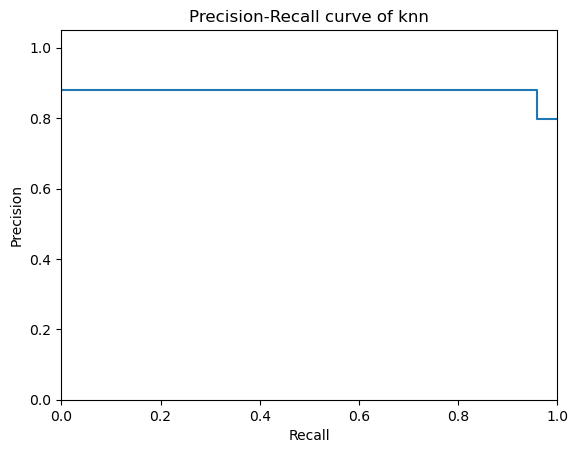

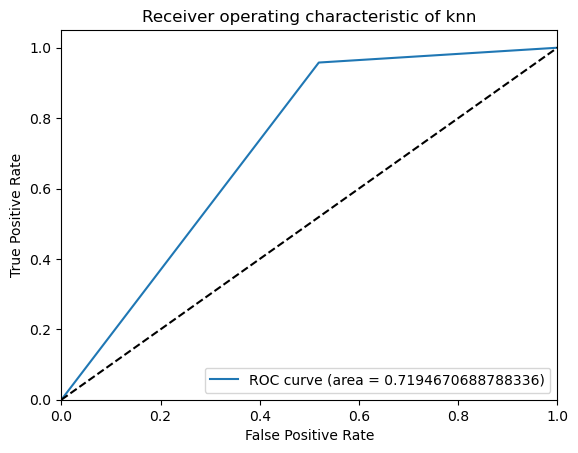

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_bin)
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of knn')
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic of knn')
plt.legend(loc="lower right")
plt.show()